# Import Libraries 

In [35]:
import pandas as pd

# Load Dataset

In [36]:
data=pd.read_csv(r"C:\Users\KUSHAL\OneDrive\Desktop\Email_spam_detection_original.csv", encoding='latin-1')

# Explore Dataset

In [37]:
data.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [38]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

data.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [40]:
data= data.rename(columns={'v1':'Type', 'v2':'Message'})
data['M_Length']= data['Message'].apply(len)

data.head(10)

,Type,Message,M_Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148
6,ham,Even my brother is not like to speak with me. ...,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160
8,spam,WINNER!! As a valued network customer you have...,158
9,spam,Had your mobile 11 months or more? U R entitle...,154


In [41]:
data.groupby('Type').describe()

M_Length                                                         
        count        mean        std   min    25%    50%    75%    max
Type                                                                  
ham    4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0
spam    747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0

In [42]:
data.isnull().sum()

Type        0
Message     0
M_Length    0
dtype: int64

In [43]:
data['Type'].value_counts().to_frame()

,count
Type,
ham,4825
spam,747


# Chart

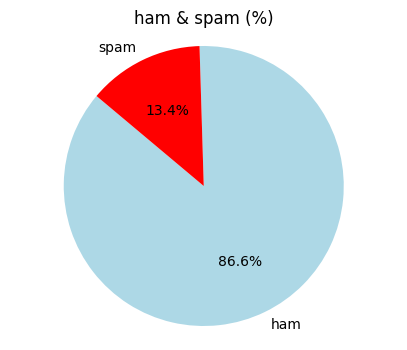

In [44]:
import matplotlib.pyplot as plt

labels = ['ham','spam']
sizes = [4825,747]

plt.figure(figsize=(5, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'red'])

plt.axis('equal')

plt.title('ham & spam (%)')

plt.show()


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

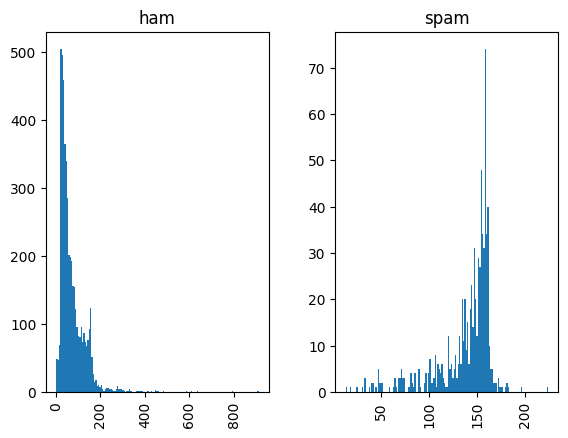

In [45]:
data.hist(column='M_Length', by='Type', bins = 150)

In [46]:
# Counting spam words

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

documents= data['Message'].tolist()  # Providing messages from which we want to identify words

vectorizer = CountVectorizer() 

X_all = vectorizer.fit_transform(documents)  # convert text document into count metrix 

vocabulary = vectorizer.get_feature_names_out() # get unique words or token
word_counts = X_all.sum(axis=0)       # Calculate the count of each word

word_count_dict = dict(zip(vocabulary, word_counts.A1))   # storing word counts
for word, count in word_count_dict.items():
    print(f"{word}: {count}")

00: 10
000: 29
000pes: 1
008704050406: 2
0089: 1
0121: 1
01223585236: 1
01223585334: 2
0125698789: 1
02: 8
0207: 3
02072069400: 1
02073162414: 2
02085076972: 1
021: 2
03: 13
04: 12
0430: 1
05: 5
050703: 2
0578: 2
06: 8
07: 2
07008009200: 1
07046744435: 1
07090201529: 1
07090298926: 1
07099833605: 1
07123456789: 2
0721072: 1
07732584351: 1
07734396839: 2
07742676969: 2
07753741225: 1
0776xxxxxxx: 2
07781482378: 2
07786200117: 2
077xxx: 1
078: 1
07801543489: 1
07808: 1
07808247860: 1
07808726822: 1
07815296484: 1
07821230901: 2
078498: 1
07880867867: 1
0789xxxxxxx: 1
07946746291: 1
0796xxxxxx: 1
07973788240: 1
07xxxxxxxxx: 3
08: 2
0800: 13
08000407165: 2
08000776320: 2
08000839402: 15
08000930705: 16
08000938767: 3
08001950382: 4
08002888812: 2
08002986030: 2
08002986906: 4
08002988890: 1
08006344447: 2
0808: 4
08081263000: 1
08081560665: 2
0825: 2
083: 1
0844: 2
08448350055: 1
08448714184: 1
0845: 3
08450542832: 1
08452810071: 1
08452810073: 3
08452810075over18: 2
0870: 8
08700435505150

# Model Creation

In [47]:
# Importing required libraries

from sklearn.model_selection import train_test_split   # To split dataset in train & test datasets
from sklearn.feature_extraction.text import CountVectorizer    # To create metrix of token counts
from sklearn.naive_bayes import MultinomialNB       # Naive-Bayes algo. library
from sklearn.metrics import accuracy_score, classification_report     # For evaluating model

In [48]:
# Split dataset
X = data['Message']
y = data['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Vectorize the text messages into numerical features
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Naive-Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

In [50]:
# Predictions on test dataset
y_pred = classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9838565022421525
Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

